In [1]:
# Importar Librerias
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importando la base de datos
data = pd.read_csv('techogar.csv')
print("Datos de entrada y forma")
print(data.shape)
data.head()

Datos de entrada y forma
(14, 6)


,Año,Computadora,Internet,Televisión,Cable,Teléfono
0,2001,11.777200,6.212087,91.897078,13.529983,40.331515
1,2002,15.207573,7.455098,93.592413,15.375804,45.358014
2,2004,18.001723,8.692415,91.689488,19.330399,24.740764
3,2005,18.558932,9.002206,92.816496,19.508416,22.264085
4,2006,20.622965,10.132403,93.360834,21.045569,19.458675


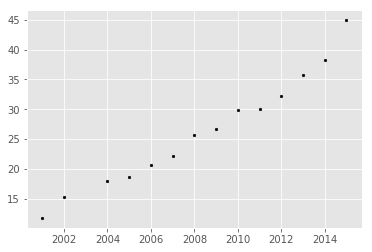

In [3]:
# Ontencion de los valores y se grafican
f1 = data['Año'].values
f2 = data['Computadora'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
# Calculadora de distancia euclidiana
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
# Numero de agrupaciones
k = 3
# X coordenadas de los centroides al azar
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordenadas de los centroides al azar
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Centroides iniciales")
print(C)

Centroides iniciales
[[1757. 1991.]
 [ 301. 1521.]
 [1012.  699.]]


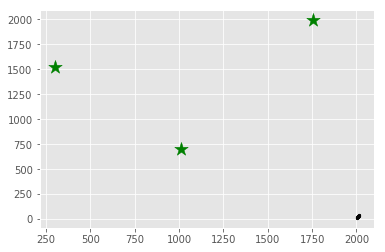

In [ ]:
#Trazando junto con los centroides
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [ ]:
# Para almacenar el valor de los centroides cuando se actualiza.
C_old = np.zeros(C.shape)
# Etiquetas de grupo(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. -Distancia entre nuevos centroides y viejos centroides
error = dist(C, C_old, None)
# El bucle se ejecutará hasta que el error sea cero
while error != 0:
    # Asignando cada valor a su cluster más cercano
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Almacenando los antiguos valores del centroide
    C_old = deepcopy(C)
    # Encontrar los nuevos centroides tomando el valor promedio
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')